<a href="https://colab.research.google.com/github/capajaro/Curso_ARG_Python/blob/main/Challenge_2_DGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Visalization**

---

**Author: Daniel Gómez** 

Import Packges


In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Uploading data and creating plots**

In [23]:
path = 'https://github.com/capajaro/Curso_ARG_Python/raw/Daniel/Concrete_Data.xls'
sheet_name = "Sheet1"
data_base = pd.read_excel(path, sheet_name)
data_base

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


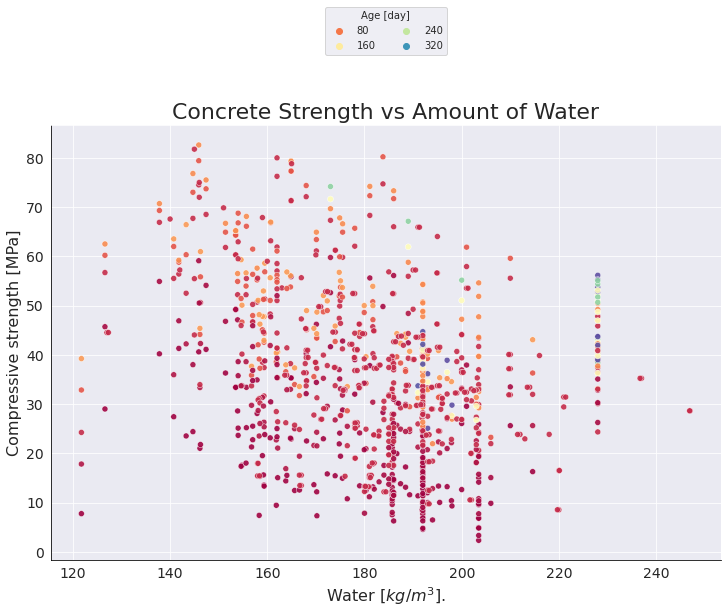

In [33]:
# Two continuous variables: Scatter Plot
col_names = data_base.columns
ax = sns.scatterplot(data = data_base, x= col_names[3], y= col_names[8], palette="Spectral", hue = col_names[7], alpha = 0.9)
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')
sns.set_style("darkgrid")
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
plt.xlabel("Water [$kg/m^3$].", size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Compressive strength [MPa]", size=16)
plt.title("Concrete Strength vs Amount of Water", size=22)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2, title="Age [day]")
plt.rcParams["figure.figsize"] = [12, 8]


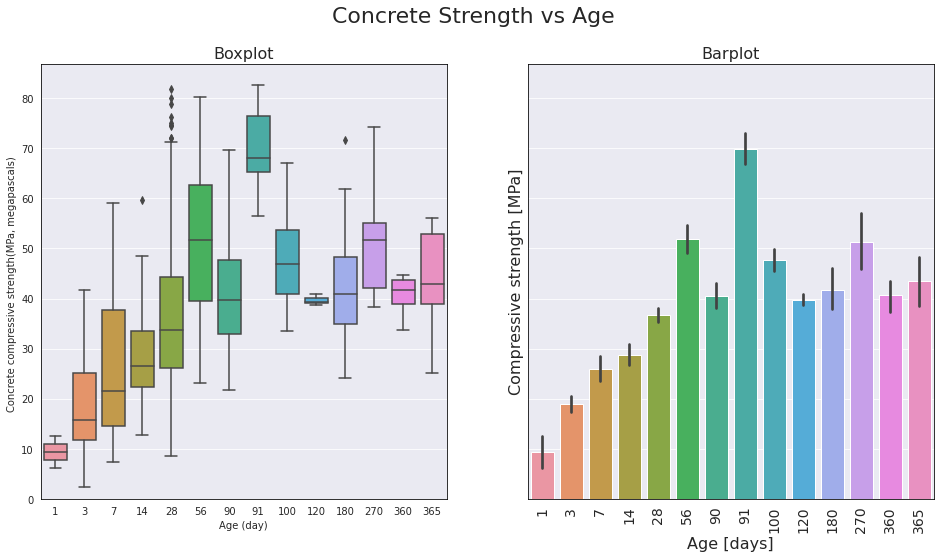

In [42]:
# One continuous variable and one discrete variable 
fig, axs = plt.subplots(1,2, figsize=(16,8),sharey= True,)
sns.boxplot(data = data_base, x= col_names[7], y= col_names[8], ax=axs[0])
axs[0].set_title('Boxplot', size=16)
sns.barplot(data = data_base, x= col_names[7], y= col_names[8], ax=axs[1])
axs[1].set_title('Barplot', size=16)
fig.suptitle("Concrete Strength vs Age", size=22)
sns.set_style("darkgrid")
plt.xlabel("Age [days]", size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Compressive strength [MPa]", size=16)
plt.xticks(rotation = 90)
axs[0].spines['bottom'].set_color('k')
axs[0].spines['left'].set_color('k')
axs[0].spines['top'].set_color('k')
axs[0].spines['right'].set_color('k')
axs[1].spines['bottom'].set_color('k')
axs[1].spines['left'].set_color('k')
axs[1].spines['top'].set_color('k')
axs[1].spines['right'].set_color('k')




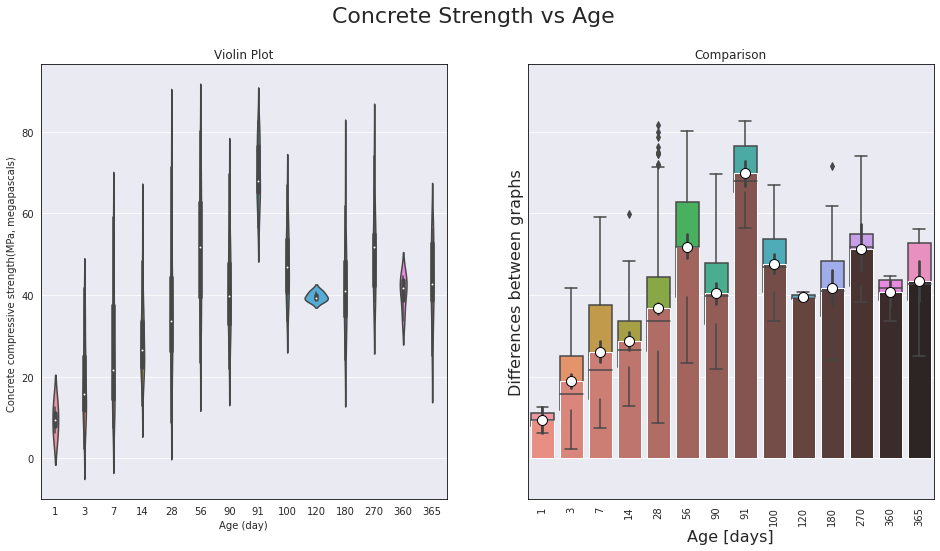

In [37]:
# One continuous variable and one discrete variable 
fig, axs = plt.subplots(1,2, figsize=(16,8), sharey= True)
sns.violinplot(data = data_base, x= col_names[7], y= col_names[8], ax=axs[0])
axs[0].set_title('Violin Plot')
sns.boxplot(data = data_base, x= col_names[7], y= col_names[8], ax=axs[1], showmeans=True , 
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.barplot(data = data_base, x= col_names[7], y= col_names[8], ax=axs[1], palette="dark:salmon_r")
axs[1].set_title('Comparison')
fig.suptitle("Concrete Strength vs Age", size=22)
sns.set_style("darkgrid")
plt.xlabel("Age [days]", size=16)
plt.ylabel("Differences between graphs", size=16)
plt.xticks(rotation = 90)
axs[0].spines['bottom'].set_color('k')
axs[0].spines['left'].set_color('k')
axs[0].spines['top'].set_color('k')
axs[0].spines['right'].set_color('k')
axs[1].spines['bottom'].set_color('k')
axs[1].spines['left'].set_color('k')
axs[1].spines['top'].set_color('k')
axs[1].spines['right'].set_color('k')

In [27]:
# 3rd case: two discrete variables
# to aims of plotting two discrete variables, we create a new column and add it to the dataframe
specimen_number = np.random.randint(30, size=data_base.shape[0])
data_base['Specimen Number'] = specimen_number
col_names = data_base.columns
heat_data = data_base[[col_names[9],col_names[7]]]
heat_data

,Specimen Number,Age (day)
0,4,28
1,17,28
2,25,270
3,4,365
4,17,360
...,...,...
1025,8,28
1026,18,28
1027,1,28
1028,3,28


Text(0.5, 1.0, 'Concrete compressive strength [MPa]')

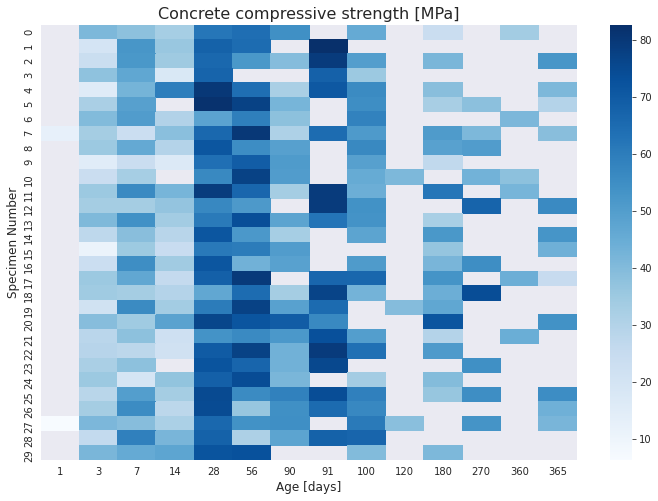

In [84]:
heat = data_base.pivot_table('Concrete compressive strength(MPa, megapascals) ',['Specimen Number'],'Age (day)',aggfunc=np.max)
sns.heatmap(heat, cmap="Blues")
plt.xlabel("Age [days]", size=12)
plt.ylabel("Specimen Number", size=12)
plt.title('Concrete compressive strength [MPa]', size=16)

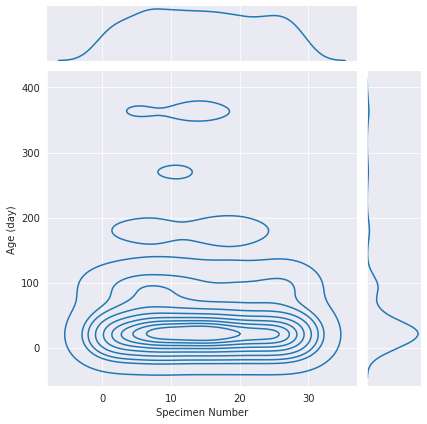

In [50]:
sns.jointplot(x = col_names[9], y=col_names[7], data=data_base, kind = 'kde')

In [51]:
#from google.colab import files
#data_base.to_csv('Heat_data.csv')
#files.download("Heat_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>